In [48]:
# Import neccesart modules
import tensorflow as tf
import keras
import matplotlib.pyplot as plt
import numpy as np

In [33]:
# Load in MNIST datasey ~ 28 x 28 hand drawn digits from 0 to 9
mnist = tf.keras.datasets.mnist 

# Split into train and test data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Normalize x_train and x_test
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test= tf.keras.utils.normalize(x_test, axis=1)

# Define Model -> Sequential -> Feed Forward
model = tf.keras.models.Sequential()

# Add model layers
model.add(tf.keras.layers.Flatten()) # Flatten input layer
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # add hidden layer, and activation function
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # add another hidden layer, and activation function
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # Output layer -> Softmax for probability distribution

# Compiler model
model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train model
model.fit(x_train, y_train, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 1s 635us/step - loss: 0.2631 - accuracy: 0.9233
Epoch 2/10
1875/1875 [==============================] - 1s 637us/step - loss: 0.1059 - accuracy: 0.9675
Epoch 3/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.0719 - accuracy: 0.9773
Epoch 4/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.0536 - accuracy: 0.9827
Epoch 5/10
1875/1875 [==============================] - 1s 632us/step - loss: 0.0414 - accuracy: 0.9866
Epoch 6/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.0331 - accuracy: 0.9887
Epoch 7/10
1875/1875 [==============================] - 1s 633us/step - loss: 0.0269 - accuracy: 0.9908
Epoch 8/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.0198 - accuracy: 0.9936
Epoch 9/10
1875/1875 [==============================] - 1s 634us/step - loss: 0.0184 - accuracy: 0.9937
Epoch 10/10
1875/1875 [==============================] - 1s 631u

In [39]:
# Calculate validation loss and validation accuracy
val_loss, val_acc = model.evaluate(x_test, y_test)
print()
print("Validation Loss:")
print(val_loss)
print()
print("Validation Acuracy:")
print(val_acc)

313/313 [==============================] - 0s 459us/step - loss: 0.1115 - accuracy: 0.9757

Validation Loss:
0.11150261014699936

Validation Acuracy:
0.9757000207901001


In [45]:
# Make Predictions
predictions = model.predict([x_test])
print(predictions)

313/313 [==============================] - 0s 426us/step
[[1.3655180e-17 1.1361345e-12 3.3696396e-11 ... 1.0000000e+00
  1.5634904e-18 3.5123550e-11]
 [8.1282283e-18 5.1708170e-14 1.0000000e+00 ... 4.1970433e-21
  1.2053429e-22 8.7082954e-30]
 [6.0124169e-15 9.9999976e-01 4.7007468e-08 ... 6.9237075e-08
  1.3297757e-09 4.1517243e-13]
 ...
 [5.5077771e-15 7.2232997e-11 5.1295410e-13 ... 3.4282395e-09
  4.3058418e-10 3.3472892e-07]
 [2.7513866e-13 4.3787394e-15 3.5796507e-14 ... 7.9665007e-14
  9.8077404e-09 5.7315961e-16]
 [4.3080523e-14 8.5248250e-15 4.4775091e-12 ... 1.5917950e-16
  1.0424181e-13 3.3598147e-18]]


Prediction:  7


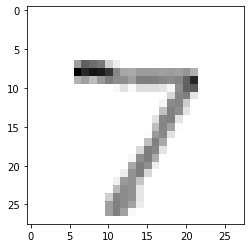

Prediction:  2


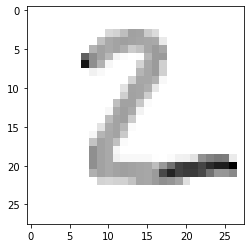

Prediction:  1


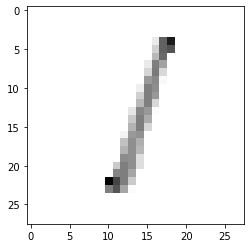

Prediction:  0


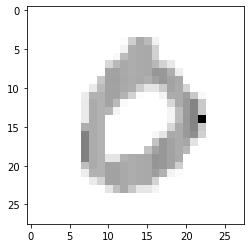

Prediction:  4


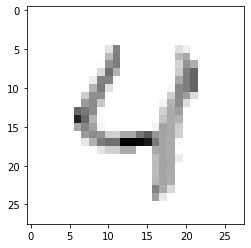

Prediction:  1


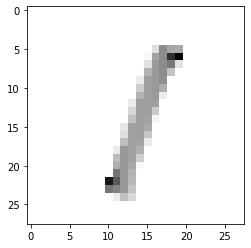

Prediction:  4


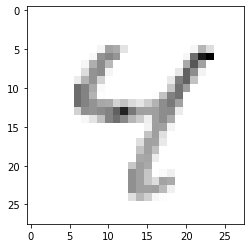

Prediction:  9


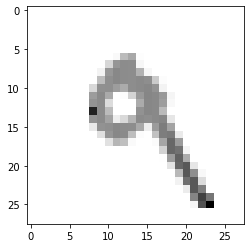

Prediction:  6


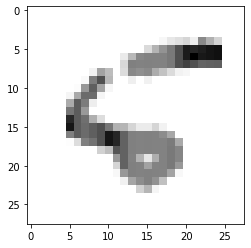

Prediction:  9


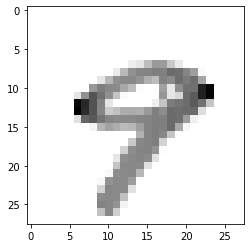

In [58]:
# Test Model and Predictions
for i in range(10):
    print("Prediction: ",np.argmax(predictions[i]))
    plt.figure()
    plt.imshow(x_test[i], cmap = plt.cm.binary )
    plt.show()

In [40]:
# Save model
model.save('num_reader.model')

# To Load Model
# new_model = tf.keras.models.load_model('num_reader.model')

INFO:tensorflow:Assets written to: num_reader.model\assets
